Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, plot_precision_recall_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

Data Collection & Pre-Processing

In [2]:
# Load the dataset
data = pd.read_csv('mail_data.csv')

# Split the data into features and labels
X = data['Message']
y = data['Category']

Splitting the data into training data & test data

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4457, dtype: object

Feature Extraction

In [4]:
# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Training model

In [5]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

Evaluation

In [6]:
# Predict the labels for the test set
y_pred = model.predict(X_test_vectorized.toarray())
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9919282511210762


Confusion Matrix:
[[966   0]
 [  9 140]]
True Positives (TP): 140
False Positives (FP): 0
True Negatives (TN): 966
False Negatives (FN): 9


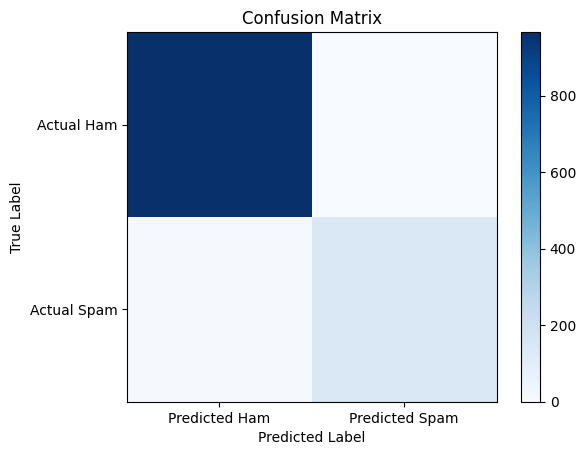

In [7]:
# Generate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Extract TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion.ravel()
print('True Positives (TP):', tp)
print('False Positives (FP):', fp)
print('True Negatives (TN):', tn)
print('False Negatives (FN):', fn)

# Confusion Matrix
plt.figure()
plt.imshow(confusion, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Ham', 'Predicted Spam'])
plt.yticks([0, 1], ['Actual Ham', 'Actual Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



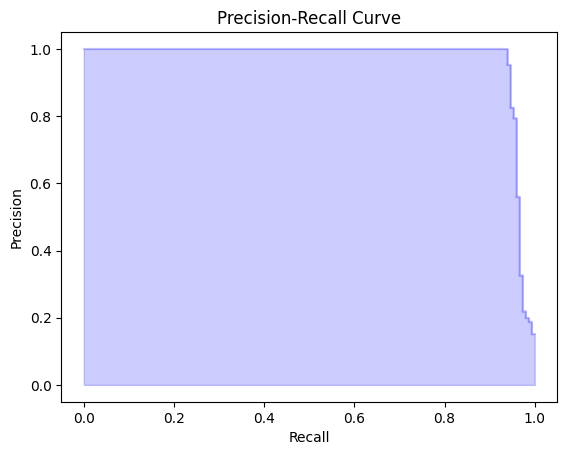

In [8]:
# Calculate probabilities for the positive class
y_prob = model.predict_proba(X_test_vectorized.toarray())[:, 1]

# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test.map({'spam': 1, 'ham': 0}), y_prob)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

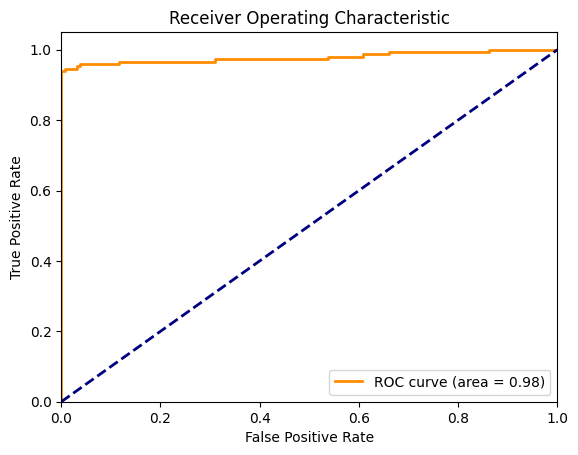

In [9]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.map({'spam': 1, 'ham': 0}), y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:

# Perform cross-validation with 5 folds
scores = cross_val_score(model, X_train_vectorized, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print('Accuracy scores for each fold:', scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print('Mean Accuracy:', mean_accuracy)

Accuracy scores for each fold: [0.9809417  0.9809417  0.97979798 0.97418631 0.98204265]
Mean Accuracy: 0.979582068819737


Test

In [11]:
with open('test.txt', 'r') as file:
    input_mail = [file.read()]

# Convert text to feature vectors
input_data_features = vectorizer.transform(input_mail)

# Making prediction
prediction = model.predict(input_data_features)
print(prediction)

['spam']
